In [1]:
import numpy as np
import pandas as pd

# Problem 1: Data Cleaning 

Q1. Load the companies and rounds data into two data frames and name them companies and rounds2 respectively

In [2]:
# Reading 1st data file
companies=pd.read_csv('companies.txt', sep='\t',encoding='ANSI')
companies.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN


In [3]:
rounds2=pd.read_csv('rounds2.csv',encoding='ANSI')
rounds2.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0


Q2.  How many unique companies are present in companies?

In [5]:
companies['Company Name']=companies['permalink'].str.lower()

In [6]:
# Number of unique companies in companies
companies['Company Name'].nunique()

66368

Q3: How many unique companies are present in rounds2?

In [4]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [7]:
# Number of unique companies in Rounds2
rounds2['company_permalink'].nunique()

66368

In [8]:
# In the companies dataframe,which columns can be used as the unique key for each company
rounds2['Company Name']=rounds2['company_permalink'].str.replace('/organization/','')
rounds2['Company Name'].nunique()

66368

In [9]:
companies['Company Name']=companies['Company Name'].str.replace('/organization/','')
companies['Company Name'].nunique()

66368

In [10]:
companies['Company Name'].head()

0                    -fame
1                 -qounter
2    -the-one-of-them-inc-
3                  0-6-com
4         004-technologies
Name: Company Name, dtype: object

Q.4: Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

A.4: No, there are no unique companies in rounds2

In [11]:
# Are there any companies in rounds2 which are not there in companies
difference=(set(rounds2['Company Name']))-(set(companies['Company Name']))
len(difference)

0

In [12]:
intersection=set(rounds2['Company Name']).intersection(set(companies['Company Name']))
len(intersection)

66368

Q5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [14]:
# Merge the 2 dataframes so that all the variables (columns) in the companies frame are added to the rounds2 dataframe.
# Name the merged frame master_frame.How many observations are present in the master_frame?
master_frame=pd.merge(companies,rounds2)
master_frame.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company Name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,-qounter,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,-qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0


# Problem 2: Funding Type Analysis 

Q1: Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

In [15]:
fun_type = ['angel','private_equity','seed','venture']

In [16]:
master_frame = master_frame[master_frame['funding_round_type'].isin(fun_type) ]

In [17]:
master_frame.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company Name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,-qounter,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [18]:
# The most representative value of the investment amount for each of the four funding types
plot1=master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().reset_index()
plot1

,funding_round_type,raised_amount_usd
0,angel,9.586945e+05
1,private_equity,7.330859e+07
2,seed,7.198180e+05
3,venture,1.174895e+07


In [19]:
master_frame_type = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

Q2. Based on the most representative investment amount calculated above, which
investment type do you think is the most suitable for Teclov?

A2.Based on the most representative investment amount calculated above, venture
investment type is the most suitable for Teclov.

In [20]:
master_frame_type
# The mean of Venture is coming between 5 million to 15 million USD,therefore we will select VENTURE based on the budget

funding_round_type
angel             9.586945e+05
private_equity    7.330859e+07
seed              7.198180e+05
venture           1.174895e+07
Name: raised_amount_usd, dtype: float64

In [21]:
# Filtering the data so that it only contains VENTURE funding type
master_frame=master_frame[master_frame['funding_round_type']=='venture']
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company Name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,-qounter,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,-the-one-of-them-inc-,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0ndine-biomedical-inc,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/Organization/1-Mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,1-mainstream,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0


# Problem 3: Country Analysis 

Q1.Teclov wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type).Identify the top three English-speaking countries in the data frame top9. 

In [22]:
# Top 9 Countries which received the highest total funding
top9=master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index()
top9.columns=['Country','Total Investment']
print(top9.head(9))
# USA is the top country to Invest for Venture type
top3_english=['USA','IND','GBR']
print("Top 3 English Speaking Countries")
for i in top9['Country']:
    if i in top3_english:
        print(i)

  Country  Total Investment
0     USA      4.225108e+11
1     CHN      3.983542e+10
2     GBR      2.024563e+10
3     IND      1.439186e+10
4     CAN      9.583332e+09
5     FRA      7.259537e+09
6     ISR      6.907515e+09
7     DEU      6.346960e+09
8     JPN      3.363677e+09
Top 3 English Speaking Countries
USA
GBR
IND


Q2. For the chosen investment type, make a data frame named top9 with the top
nine countries (based on the total investment amount each country has
received)

In [23]:
plot2=top9.head(9)

In [24]:
plot2

,Country,Total Investment
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


# Problem 4: Sector Analysis 1 

In [66]:
len(master_frame['category_list'])

15414

In [67]:
category_list=list(master_frame['category_list'])
len(category_list)

15414

Q1. Extract the primary sector of each category list from the category_list
column

In [68]:
# master_frame['category_list']=master_frame['category_list'].str.split('|').str[0]
# master_frame['category_list']=master_frame['category_list'].map(lambda x:str(x).split('|')[0])
primary_sector=[]
a=[]
for i in category_list:
    if '|' in str(i):
        a=i.split('|')
        primary_sector.append(a[0])
    else:
        primary_sector.append(i)
master_frame['Primary Sector']=primary_sector
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company Name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary Sector,Category_List,Main Sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
1,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90min,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment
2,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90min,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment
4,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,all-def-digital,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Media,Entertainment
11,/Organization/Basel-Switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,basel-switzerland,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.0,Media,Media,Entertainment


Q2.Use the mapping file 'mapping.csv' to map each primary sector to one of the
eight main sectors (Note that ‘Others’ is also considered one of the main
sectors)

In [29]:
# Reading mapping data
map_data=pd.read_csv("mapping.csv")
map_data.head(3)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0


In [30]:
map_data.set_index('category_list',inplace=True) # setting the index as category_list

map_data1=map_data[map_data==1].stack().reset_index()
map_data1.head()

,category_list,level_1,0
0,NaN,Blanks,1.0
1,3D,Manufacturing,1.0
2,3D Printing,Manufacturing,1.0
3,3D Technology,Manufacturing,1.0
4,Accounting,"Social, Finance, Analytics, Advertising",1.0


In [31]:
len(map_data1)

688

In [32]:
map_data1.drop(columns=0,inplace=True)
map_data1.columns=['Category_List','Main Sector']
map_data1.head(5)

,Category_List,Main Sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [70]:
# Mapping
master_frame=pd.merge(master_frame,map_data1,how='inner',left_on='Primary Sector',right_on='Category_List')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_code,funded_at,raised_amount_usd,Primary Sector,Category_List_x,Main Sector_x,Category_List_y,Main Sector_y,Category_List,Main Sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,B,05-01-2015,10000000.0,Media,Media,Entertainment,Media,Entertainment,Media,Entertainment
1,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,NaN,06-10-2015,15000000.0,Media,Media,Entertainment,Media,Entertainment,Media,Entertainment
2,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,NaN,07-05-2013,5800000.0,Media,Media,Entertainment,Media,Entertainment,Media,Entertainment
3,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,A,06-08-2014,5000000.0,Media,Media,Entertainment,Media,Entertainment,Media,Entertainment
4,/Organization/Basel-Switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,...,NaN,07-01-2002,13439178.0,Media,Media,Entertainment,Media,Entertainment,Media,Entertainment


In [34]:
len(master_frame)

51936

# Problem 5: Sector Analysis 2 

Q1. Create three separate data frames D1, D2 and D3 for each of the three
countries containing the observations of funding type FT falling within the 5-15
million USD range. The three data frames should contain:

a) All the columns of the master_frame along with the primary sector and the
main sector

b) The total number (or count) of investments for each main sector in a separate
column

c) The total amount invested in each main sector in a separate column

In [35]:
master_frame=master_frame[master_frame['raised_amount_usd'].between(5000000,15000000)]
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company Name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary Sector,Category_List,Main Sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
1,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90min,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment
2,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90min,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment
4,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,all-def-digital,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Media,Entertainment
11,/Organization/Basel-Switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,basel-switzerland,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.0,Media,Media,Entertainment


In [36]:
len(master_frame)

15414

In [37]:
# Creating 3 seperate dataframes for each top 3 countries
d1_usa=master_frame[master_frame['country_code']=='USA']
d2_ind=master_frame[master_frame['country_code']=='IND']
d3_gbr=master_frame[master_frame['country_code']=='GBR']
print(len(d1_usa))
print(len(d2_ind))
print(len(d3_gbr))

11235
301
584


In [38]:
d11_usa = d1_usa.groupby('Main Sector')['raised_amount_usd'].sum().reset_index()
d11_usa.columns=['Main Sector','Total Invested Amount(USA)']

In [39]:
count=d1_usa.groupby('Main Sector')['raised_amount_usd'].count().reset_index()
count.columns=['Main Sector','Count']
d11_usa['Number of Investment(USA)']=count['Count']
d11_usa.sort_values(by='Number of Investment(USA)',ascending=False,inplace=True)
d11_usa

,Main Sector,Total Invested Amount(USA),Number of Investment(USA)
7,Others,2.608928e+10,2923
2,Cleantech / Semiconductors,2.118100e+10,2297
8,"Social, Finance, Analytics, Advertising",1.668070e+10,1912
6,"News, Search and Messaging",1.379682e+10,1563
4,Health,8.200859e+09,908
5,Manufacturing,7.258553e+09,799
3,Entertainment,5.000213e+09,580
0,Automotive & Sports,1.454104e+09,167
1,Blanks,7.647633e+08,86


In [40]:
numinvest_usa=d11_usa['Number of Investment(USA)'].sum()
amtinvest_usa=d11_usa['Total Invested Amount(USA)'].sum()
top1sector_usa,top2sector_usa,top3sector_usa=d11_usa['Main Sector'].values[[0,1,2]]
top1sectorinvest_usa,top2sectorinvest_usa,top3sectorinvest_usa=d11_usa['Total Invested Amount(USA)'].values[[0,1,2]]
# print(numinvest_usa)
# print(amtinvest_usa)
# print(top1sector_usa)
# print(top2sector_usa)
# print(top3sector_usa)
# print(top1sectorinvest_usa)
# print(top2sectorinvest_usa)
# print(top3sectorinvest_usa)

In [41]:
top3_usa=d11_usa.head(3)
top3_usa

,Main Sector,Total Invested Amount(USA),Number of Investment(USA)
7,Others,2.608928e+10,2923
2,Cleantech / Semiconductors,2.118100e+10,2297
8,"Social, Finance, Analytics, Advertising",1.668070e+10,1912


In [42]:
top3comp_usa=d1_usa[d1_usa['Main Sector']=='Others'].groupby('Company Name')['raised_amount_usd'].sum().reset_index()
top3comp_usa.columns=['Company Name','Total Amount Invested(USA)']
top3comp_usa.sort_values(by='Total Amount Invested(USA)',ascending=False,inplace=True)
top1comp_usa,top2comp_usa=top3comp_usa['Company Name'].values[[0,1]]
print(top1comp_usa)
print(top2comp_usa)

virtustream
capella


In [43]:
top3comp_usa.head(3)

,Company Name,Total Amount Invested(USA)
1923,virtustream,64300000.0
307,capella,54968051.0
50,airtight-networks,54201907.0


In [44]:
# print("USA")
# d11_usa=d1_usa.pivot_table(index='Main Sector',values='raised_amount_usd',aggfunc={'count','sum'}).sort_values(by='count',ascending=False)
# d11_usa

In [45]:
# print("INDIA")
# d22_ind=d2_ind.pivot_table(index='Main Sector',values='raised_amount_usd',aggfunc={'count','sum'}).sort_values(by='count',ascending=False)
# d22_ind

In [46]:
d22_ind=d2_ind.groupby('Main Sector')['raised_amount_usd'].sum().reset_index()
d22_ind.columns=['Main Sector','Total Invested Amount(IND)']

In [47]:
count1=d2_ind.groupby('Main Sector')['raised_amount_usd'].count().reset_index()
count1.columns=['Main Sector','Count']
d22_ind['Number of Investment(IND)']=count1['Count']
d22_ind.sort_values(by='Number of Investment(IND)',ascending=False,inplace= True)

In [48]:
top3_ind=d22_ind.head(3)
top3_ind

,Main Sector,Total Invested Amount(IND),Number of Investment(IND)
7,Others,1.007410e+09,109
6,"News, Search and Messaging",4.338345e+08,52
3,Entertainment,2.808300e+08,33


In [49]:
top3comp_ind=d2_ind[d2_ind['Main Sector']=='Others'].groupby('Company Name')['raised_amount_usd'].sum().reset_index()
top3comp_ind.columns=['Company Name','Total Amount Invested(IND)']

In [50]:
top3comp_ind.sort_values(by='Total Amount Invested(IND)',ascending=False,inplace=True)
top3comp_ind.head(3)

,Company Name,Total Amount Invested(IND)
26,firstcry-com,39000000.0
47,myntra,38000000.0
16,commonfloor,32900000.0


In [51]:
numinvest_ind=d22_ind['Number of Investment(IND)'].sum()
amtinvest_ind=d22_ind['Total Invested Amount(IND)'].sum()
top1sector_ind,top2sector_ind,top3sector_ind=d22_ind['Main Sector'].values[[0,1,2]]
top1sectorinvest_ind,top2sectorinvest_ind,top3sectorinvest_ind=d22_ind['Total Invested Amount(IND)'].values[[0,1,2]]
top1comp_ind,top2comp_ind=top3comp_ind['Company Name'].values[[0,1]]
# print(numinvest_ind)
# print(amtinvest_ind)
# print(top1sector_ind)
# print(top2sector_ind)
# print(top3sector_ind)
# print(top1sectorinvest_ind)
# print(top2sectorinvest_ind)
# print(top3sectorinvest_ind)
# print(top1comp_ind)
# print(top2comp_ind)

In [52]:
# print("GREAT BRITAIN")
# d33_gbr=d3_gbr.pivot_table(index='Main Sector',values='raised_amount_usd',aggfunc={'count','sum'}).sort_values(by='count',ascending=False)
# d33_gbr

In [53]:
d33_gbr=d3_gbr.groupby('Main Sector')['raised_amount_usd'].sum().reset_index()
d33_gbr.columns=['Main Sector','Total Invested Amount(GBR)']

In [54]:
count2=d3_gbr.groupby('Main Sector')['raised_amount_usd'].count().reset_index()
count2.columns=['Main Sector','Count']
d33_gbr['Number of Investment(GBR)']=count2['Count']
d33_gbr.sort_values(by='Number of Investment(GBR)',ascending=False,inplace=True)

In [55]:
top3_gbr=d33_gbr.head(3)
top3_gbr

,Main Sector,Total Invested Amount(GBR),Number of Investment(GBR)
7,Others,1.249124e+09,143
2,Cleantech / Semiconductors,1.136905e+09,127
8,"Social, Finance, Analytics, Advertising",8.218884e+08,98


In [56]:
top3comp_gbr=d3_gbr[d3_gbr['Main Sector']=='Others'].groupby('Company Name')['raised_amount_usd'].sum().reset_index()
top3comp_gbr.columns=['Company Name','Total Invested Amount(GBR)']
top3comp_gbr.sort_values(by='Total Invested Amount(GBR)',ascending=False,inplace=True)
top3comp_gbr.head(3)

,Company Name,Total Invested Amount(GBR)
34,electric-cloud,37000000.0
85,sensage,36250000.0
35,enigmatic,32500000.0


In [57]:
numinvest_gbr=d33_gbr['Number of Investment(GBR)'].sum()
amtinvest_gbr=d33_gbr['Total Invested Amount(GBR)'].sum()
top1sector_gbr,top2sector_gbr,top3sector_gbr=d33_gbr['Main Sector'].values[[0,1,2]]
top1sectorinvest_gbr,top2sectorinvest_gbr,top3sectorinvest_gbr=d33_gbr['Total Invested Amount(GBR)'].values[[0,1,2]]
top1comp_gbr,top2comp_gbr=top3comp_gbr['Company Name'].values[[0,1]]
# print(numinvest_gbr)
# print(amtinvest_gbr)
# print(top1sector_gbr)
# print(top2sector_gbr)
# print(top3sector_gbr)
# print(top1sectorinvest_gbr)
# print(top2sectorinvest_gbr)
# print(top3sectorinvest_gbr)
# print(top1comp_gbr)
# print(top2comp_gbr)

In [58]:
USA=pd.Series([numinvest_usa,amtinvest_usa,top1sector_usa,top2sector_usa,top3sector_usa,top1sectorinvest_usa,top2sectorinvest_usa,top3sectorinvest_usa,top1comp_usa,top2comp_usa])
IND=pd.Series([numinvest_ind,amtinvest_ind,top1sector_ind,top2sector_ind,top3sector_ind,top1sectorinvest_ind,top2sectorinvest_ind,top3sectorinvest_ind,top1comp_ind,top2comp_ind])
GBR=pd.Series([numinvest_gbr,amtinvest_gbr,top1sector_gbr,top2sector_gbr,top3sector_gbr,top1sectorinvest_gbr,top2sectorinvest_gbr,top3sectorinvest_gbr,top1comp_gbr,top2comp_gbr])

In [59]:
sectoranalysis=pd.concat([USA,IND,GBR],axis=1)
# sectoranalysis

In [60]:
sectoranalysis.index=['Total Number of Investments(Count)','Total Amount of Investment(USD)','Top Sector(based on count of investment)','Second Best Sector(based on count of investment)','Third Best Sector(based on count of investment)','Number of investment in the top sector','Number of investment in the second best sector','Number of investment in the third best sector','Top sector count wise, company name receiving highest amount','Second Best sector count wise, company name receiving highest amount']
# sectoranalysis

In [61]:
sectoranalysis.columns=['Country-1(USA)','Country-2(IND)','Country-3(GBR)']
print("Sector Wise Investment Analysis ")
sectoranalysis

Sector Wise Investment Analysis 


,Country-1(USA),Country-2(IND),Country-3(GBR)
Total Number of Investments(Count),11235,301,584
Total Amount of Investment(USD),1.00426e+11,2.71054e+09,5.08647e+09
Top Sector(based on count of investment),Others,Others,Others
Second Best Sector(based on count of investment),Cleantech / Semiconductors,"News, Search and Messaging",Cleantech / Semiconductors
Third Best Sector(based on count of investment),"Social, Finance, Analytics, Advertising",Entertainment,"Social, Finance, Analytics, Advertising"
Number of investment in the top sector,2.60893e+10,1.00741e+09,1.24912e+09
Number of investment in the second best sector,2.1181e+10,4.33835e+08,1.13691e+09
Number of investment in the third best sector,1.66807e+10,2.8083e+08,8.21888e+08
"Top sector count wise, company name receiving highest amount",virtustream,firstcry-com,electric-cloud
"Second Best sector count wise, company name receiving highest amount",capella,myntra,sensage


# Problem 6: Plots 

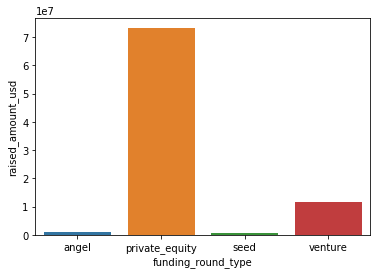

In [62]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
sb.barplot(plot1['funding_round_type'],plot1['raised_amount_usd'])

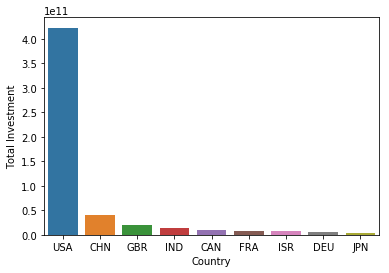

In [63]:
sb.barplot(plot2['Country'],plot2['Total Investment'])